In [7]:
# Prepare data
import numpy as np

def make_wave(n_samples=50):
      rnd = np.random.RandomState(41)
      x = rnd.uniform(-3, 3, size=n_samples)
      y_no_noise = (np.sin(4 * x) + x)
      y = (y_no_noise + rnd.normal(size=len(x))) / 2
      return x.reshape(-1, 1), y

X, y = make_wave() # type is tuple

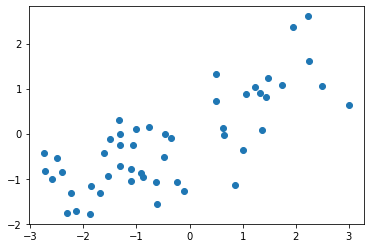

In [8]:
# Visualize data

import matplotlib.pyplot as plt

plt.scatter(X, y)

(0.0, 1.0)

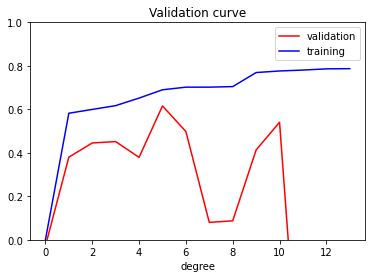

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve

degrees = np.arange(0,14)

model = make_pipeline(PolynomialFeatures(), LinearRegression())

# The parameter to vary is the "degrees" on the pipeline step

train_scores, validation_scores = validation_curve(
                 model, X, y,
                 param_name = 'polynomialfeatures__degree',
                 param_range = degrees, cv = 7)

# print(train_scores)
# print(validation_scores)

val_scores_mean = np.median(validation_scores, 1)
train_scores_mean = np.median(train_scores, 1)

# print('validation:\n\n', val_scores_mean, '\n\n')
# print('train:\n\n', train_scores_mean, '\n\n')

# Plot the mean train error and validation error across folds

plt.plot(degrees, val_scores_mean, label = 'validation', color = "Red")
plt.plot(degrees, train_scores_mean, label = 'training', color = "Blue")

plt.legend(loc = 'best')
plt.xlabel('degree')
# plt.ylabel('explained variance')
plt.title('Validation curve')
plt.ylim((0.0, 1.0))

The best degree of the training is 13
The best degree of the validation is 5


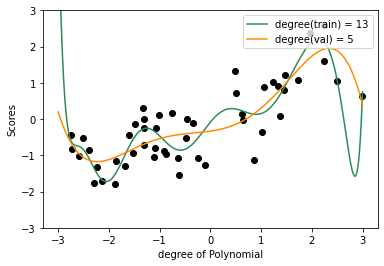

In [12]:
print("The best degree of the training is", np.argmax(train_scores_mean))
print("The best degree of the validation is", np.argmax(val_scores_mean))

X_test = np.linspace(-3.0, 3.0, 500)[:, np.newaxis]

model_train = make_pipeline(PolynomialFeatures(13), LinearRegression())
model_train.fit(X,y)
plt.plot(X_test, model_train.predict(X_test), label = 'degree(train) = 13', color = 'seagreen')

model_val = make_pipeline(PolynomialFeatures(5), LinearRegression())
model_val.fit(X,y)
plt.ylim((-3, 3))
plt.plot(X_test, model_val.predict(X_test), label = 'degree(val) = 5', color = 'darkorange')
plt.scatter(X, y, color = 'black')
plt.xlabel('degree of Polynomial')
plt.ylabel('Scores')
plt.legend(loc = 'upper right')         # 來顯示數據的名稱，loc 設定顯示的位置